# Star Wars Survey

Star Wars has been one of the most talked-about movies on social media worldwide. The team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: 

    Does the rest of America realize that “Episode 5- The Empire Strikes Back” is clearly the best of the bunch?
    
To address this question, they surveyed Star Wars fans using the online tool SurveyMonkey. In this project, we'll explore and analyze the dataset.

The data has several columns, including:

* RespondentID - An anonymized ID for the respondent (person taking the survey)
* Gender - The respondent's gender
* Age - The respondent's age
* Household Income - The respondent's income
* Education - The respondent's education level
* Location (Census Region) - The respondent's location
* Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
* Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response

For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. 

In [1]:
import pandas as pd
import numpy as np

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

In [2]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Reorganizing Data

### Delete invalid rows
First, RespondentID is supposed to be a unique ID for each respondent. We need to remove rows with invalid RespondentID.

In [4]:
#exclude the rows where RespondentID is NaN
star_wars = star_wars[star_wars['RespondentID'].notnull()]

### Convert values to boolean
Next, we'll change the two Yes/No question to boolean:

* Have you seen any of the 6 films in the Star Wars franchise?
* Do you consider yourself to be a fan of the Star Wars film franchise?

In [5]:
# check their value first
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [7]:
#change value to boolean
yes_no = {"Yes": True, "No":False}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

The next six columns represent a single checkbox question. 

* Which of the following Star Wars films have you seen? Please select all that apply. (Episode I)
* Unnamed: 4 (Episode II)
* Unnamed: 5 (Episode III)
* Unnamed: 6 (Episode IV)
* Unnamed: 7 (Episode V) 
* Unnamed: 8 (Episode VI)

For each of these columns, if the value in a cell is a name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. It's easier if we tranform the columns into boolean values.

In [8]:
# select the column names
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [9]:
# rename the columns
seen = {'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1','Unnamed: 4':'seen_2','Unnamed: 5':'seen_3','Unnamed: 6':'seen_4','Unnamed: 7':'seen_5','Unnamed: 8':'seen_6'}

star_wars = star_wars.rename(columns=seen) 

In [10]:
# change the value to boolean
def to_boolean(x):
    if pd.notnull(x):
        return True
    else:
        return False
    
star_wars.iloc[:, 3:9] = star_wars.iloc[:, 3:9].applymap(to_boolean)

# check if it's tranformed successfully
star_wars.iloc[:, 3:9].head()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


#### Change value to numeric type

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. Each of the following columns can contain a value from 1 to 6 or NaN. 

1 means the film was the most favorite, and 6 means it was the least favorite.

The columns are as follows:

* Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. (Episode I)
* Unnamed: 10 (Episode II) 
* Unnamed: 11 (Episode III)
* Unnamed: 12 (Episode IV) 
* Unnamed: 13 (Episode V) 
* Unnamed: 14 (Episode VI)

In [11]:
# select the column names
star_wars.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [12]:
# rename the columns
rank = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'rank_1',
       'Unnamed: 10': 'rank_2', 'Unnamed: 11':'rank_3', 'Unnamed: 12':'rank_4', 'Unnamed: 13':'rank_5',
       'Unnamed: 14':'rank_6'}

star_wars = star_wars.rename(columns=rank) 

In [13]:
# change the rating to float type
star_wars.iloc[:, 9:15] =star_wars.iloc[:, 9:15].astype(float)

# check if it's tranformed
star_wars.iloc[:, 9:15].head()

,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


## Analyzing the Data

Our aim of this goal to determine whether statistical survey results aligns with the fact that Episode 5 is the pick of the bunch. 

#### Ranking

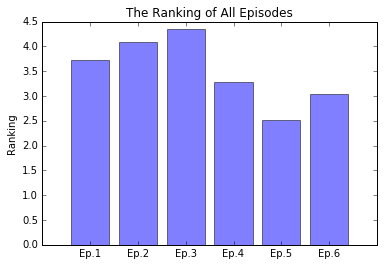

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

#check out the ranking of each film
episodes = ['Ep.1', 'Ep.2', 'Ep.3', 'Ep.4', 'Ep.5', 'Ep.6']
ranking_means = star_wars.iloc[:, 9:15].mean()
y_pos = np.arange(len(episodes))


plt.bar(y_pos, ranking_means, align='center', alpha=0.5)
plt.xticks(y_pos, episodes)
plt.ylabel('Ranking')
plt.title('The Ranking of All Episodes')

The lower the ranking, the more the episode is favored by audience. In the plot, we can see that most people named episode 6 as their favorite Star Wars film.

#### Viewership

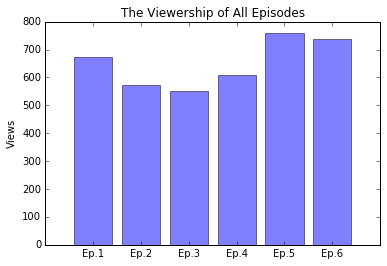

In [15]:
#calculate the sum of people having seen those episode
episodes = ['Ep.1', 'Ep.2', 'Ep.3', 'Ep.4', 'Ep.5', 'Ep.6']
seen_sum = star_wars.iloc[:,3:9].sum()
y_pos = np.arange(len(episodes))

plt.bar(y_pos, seen_sum, align='center', alpha=0.5)
plt.xticks(y_pos, episodes)
plt.ylabel('Views')
plt.title('The Viewership of All Episodes')

As expected, episode 5 attracted the most viewers.

#### Ranking and Viewership by Gender

Finally, we would like to see if we can witness any gender gap in popularity in this survey.

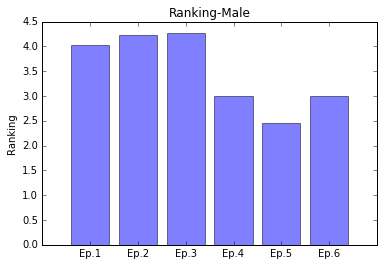

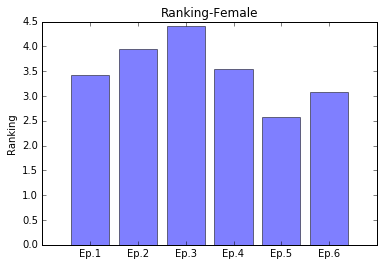

In [16]:
#explore the highest ranking and highest watched among male and female
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

#highest rank
def highest_rank(gender, plot_title):
    episodes = ['Ep.1', 'Ep.2', 'Ep.3', 'Ep.4', 'Ep.5', 'Ep.6']
    y_pos = np.arange(len(episodes))
    means = gender.iloc[:,9:15].mean()

    plt.bar(y_pos, means, align='center', alpha=0.5)
    plt.xticks(y_pos, episodes)
    plt.ylabel('Ranking')
    plt.title(plot_title)
    plt.show()

highest_rank(males, 'Ranking-Male')
highest_rank(females, 'Ranking-Female')

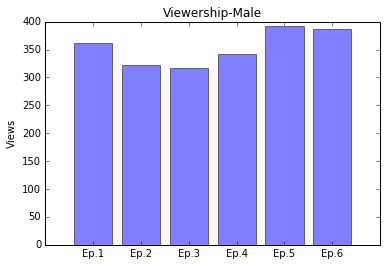

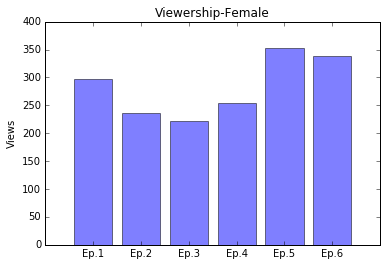

In [18]:
#highest watched times
def highest_seen(gender, title):
    episodes = ['Ep.1', 'Ep.2', 'Ep.3', 'Ep.4', 'Ep.5', 'Ep.6']
    seen_sum = gender.iloc[:,3:9].sum()
    y_pos = np.arange(len(episodes))

    plt.bar(y_pos, seen_sum, align='center', alpha=0.5)
    plt.xticks(y_pos, episodes)
    plt.ylabel('Views')
    plt.title(title)

    plt.show()
    
highest_seen(males, 'Viewership-Male')
highest_seen(females, 'Viewership-Female')

There aren't many differences between ratings from men and women.